<div style="border-top: 2px solid rgb(19, 190, 212); margin-top: 10px; margin-bottom: 10px;"></div>


## <span style="color:rgb(19, 190, 212);">A. Introduction</span>


### <span style="color:rgb(10, 127, 143);">**HEALTH INSURANCE RECOMMENDER SYSTEM**</span>



### <span style="color:rgb(10, 127, 143);">**Abstract** </span>


Health insurance is crucial for financial security and access to quality healthcare. However, selecting the right insurance plan remains a challenge due to affordability constraints, policy complexities, and limited coverage for chronic conditions. This study aims to develop a personalized Health Insurance Recommender System that suggests the most suitable insurance plans based on users’ health conditions, financial capacity, and required benefits. The system will utilize demographic-based recommendations, collaborative filtering, and affordability-based segmentation to guide users in making informed decisions. Additionally, the study will analyze socioeconomic factors affecting health insurance adoption, identify coverage gaps, and assess how policy attributes influence user preferences. The results will offer insights for insurers to enhance policy accessibility and affordability, ultimately improving insurance penetration rates in Kenya.


### <span style="color:rgb(10, 127, 143);">**Problem Statement** </span>

In Kenya, health insurance penetration remains low, with many individuals struggling to find appropriate coverage due to affordability constraints and policy complexity. The lack of a structured recommendation system leads to misinformed choices, leaving many underinsured or uninsured. Individuals with chronic illnesses, such as asthma, diabetes, hypertension, cancer, and HIV, face even greater difficulties in obtaining sufficient coverage at an affordable rate.

Current health insurance selection methods primarily rely on user research or recommendations from agents, which can be biased and limited in scope. Additionally, low-income individuals often prioritize cost over comprehensive coverage, increasing their financial burden during medical emergencies. There is a need for a data-driven recommender system that simplifies insurance selection by considering users' health conditions, financial status, and policy preferences. This study aims to bridge the gap by developing a recommender system that enhances decision-making, improves insurance accessibility, and ensures that individuals receive adequate health coverage based on their needs.


### <span style="color:rgb(10, 127, 143);">**Health Insurance Coverage in Kenya and Challenges**</span> 


Health insurance in Kenya is primarily provided through the Social Health Authority (SHA) and private insurance companies.SHA covers formal sector employees mandatorily, while informal sector workers and low-income individuals must opt in voluntarily. Private insurers offer a range of policies tailored to different income groups, including employer-sponsored health plans, family insurance, and individual policies.  

Despite these options, several challenges persist:  
- **Low Penetration Rates**: A large portion of Kenya’s population remains uninsured, with affordability and lack of awareness being major barriers.  
- **Affordability Issues**: High insurance premiums, deductibles, and co-payment requirements deter low-income individuals from enrolling.  
- **Limited Coverage for Chronic Conditions**: Many insurance providers impose exclusions or high costs for individuals with pre-existing conditions like diabetes, cancer, and hypertension.  
- **Complex Policy Structures**: The variety of policies with different benefits, exclusions, and pricing makes it difficult for users to choose the best plan.  
- **Inadequate Public Health Insurance**: NHIF benefits are sometimes insufficient, forcing patients to pay out-of-pocket for essential services.  


### <span style="color:rgb(10, 127, 143);">**Objectives**</span>



####  <span style="color:rgb(10, 127, 143);">Primary Objectives</span>

1. Develop a recommender system that provides personalized insurance recommendations by analyzing a user’s pre-existing conditions, financial capacity, and required benefits, ensuring they select the most suitable coverage.

2. Implement techniques such as demographic-based recommendations, collaborative filtering, and default user profiles to ensure that new users receive relevant insurance suggestions even with minimal historical data.

####  <span style="color:rgb(10, 127, 143);">Secondary Objectives</span>

3. Analyze the impact of socioeconomic factors (e.g., age, gender, income, and location) on health insurance adoption and affordability.

4. Identify gaps in insurance coverage by evaluating how individuals with chronic illnesses (asthma, diabetes, hypertension, cancer, HIV) are insured across different income levels.

5. Develop an affordability-based insurance segmentation model to recommend the best plans for low-income individuals while ensuring sufficient coverage for chronic conditions.

6. Assess the role of policy attributes (e.g., premium cost, deductibles, and benefits) in determining user preferences for health insurance selection.


<div style="border-top: 2px solid rgb(19, 190, 212); margin-top: 10px; margin-bottom: 10px;"></div>


## <span style="color:rgb(19, 190, 212);">B. Data Understanding & Exploration</span>


### <span style="color:rgb(10, 127, 143);">**Load the Dataset** </span>

In [5]:
import pandas as pd
df = pd.read_csv(r"N:\Moringa\afterM\Health Insurance\Health-Insurance-Recommender-System\health_insurance_recommender.csv")
df.head()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,NaN,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,NaN,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast



#### <span style="color:rgb(10, 127, 143);">**Columns/features Descriptions**</span>

In [4]:
dfcols = pd.read_excel(r"N:\Moringa\afterM\Health Insurance\Health-Insurance-Recommender-System\health_insurance_features_definitions.xlsx")
dfcols.head(30)

,Feature,Definition
0,user_id,Unique identifier for each user
1,age,Age of the user
2,gender,"Gender of the user (Male, Female, Other)"
3,country,Country of residence
4,monthly_income,User's monthly income in USD
5,health_condition,"Primary health condition of the user (e.g., Di..."
6,plan_cost,Monthly cost of the insurance plan in USD
7,deductible_amount,Amount user pays before insurance covers expenses
8,out_of_pocket_max,Maximum amount user pays per year before full ...
9,family_size,Number of dependents in the family



### <span style="color:rgb(10, 127, 143);">**Summary Statistics** </span>

In [5]:
df.shape

(52500, 42)

We have a dataset of 52,500 individuals, each described by 42 different attributes, including demographic details, health status, and financial capacity. These features will help in analyzing trends, building predictive models, and making personalized insurance recommendations.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          52500 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               52500 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [7]:
df.describe()

,user_id,age,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,duplicate_plan_cost,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
count,52500.000000,49859.000000,49864.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,49881.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,24980.571486,48.535911,2229.294781,2.492286,2542.757659,599.710239,113.864270,381.808335,3.001423,27581.730840,4.911219,3.501067,4.990590,315353.333333
std,14433.032416,17.922048,3993.264625,1.705581,1416.930992,1029.239746,200.843563,634.008554,1.419540,13051.249725,6.010216,1.709279,3.155993,347630.969987
min,1.000000,18.000000,1.281549,0.000000,100.030000,1.260237,0.126121,1.260728,1.000000,5000.160000,0.000000,1.000000,0.000000,0.000000
25%,12479.750000,33.000000,59.004709,1.000000,1316.652500,22.398519,3.185938,21.623265,2.000000,16220.612500,1.000000,2.000000,2.000000,50000.000000
50%,24974.500000,48.000000,611.079480,2.000000,2540.765000,168.510240,31.528224,107.380008,3.000000,27641.475000,3.000000,4.000000,5.000000,100000.000000
75%,37471.250000,64.000000,1360.548180,4.000000,3766.235000,354.352950,69.125184,215.736066,4.000000,38970.142500,6.000000,5.000000,8.000000,500000.000000
max,50000.000000,79.000000,19434.987400,5.000000,4999.990000,4859.763804,971.922240,2915.811432,5.000000,49999.710000,24.000000,6.000000,10.000000,1000000.000000


### <span style="color:rgb(10, 127, 143);">**Data Cleaning** </span>

#### <span style="color:rgb(10, 127, 143);">**Verifying Missing values from summary stats** </span>

In [8]:
# Filter and display only columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(missing_columns)


age                         2641
monthly_income              2636
pre_existing_conditions     8559
user_satisfaction_rating    2619
dtype: int64


#### <span style="color:rgb(10, 127, 143);">**Handling Missing Values** </span>

I'll handle missing values based on the feature type,Domain knowledge and Distrubtions:

Numerical i.e, 
* `monthly_income` → Fill with the median (better than mean for skewed distributions).
* `age` → filled based on disribution type 
* `user_satisfaction_rating` → fill with mode to retain information , and patch the 2619 with most ratings from the dataset


Categorical 
* `pre_existing_conditions` → Fill with "Unknown" (to retain information rather than dropping rows).**

-



> <span style="color:rgb(10, 127, 143);">**Clean Missing Values** </span>

##### <span style="color:rgb(10, 127, 143);">**Numerical** </span>

1. `age`

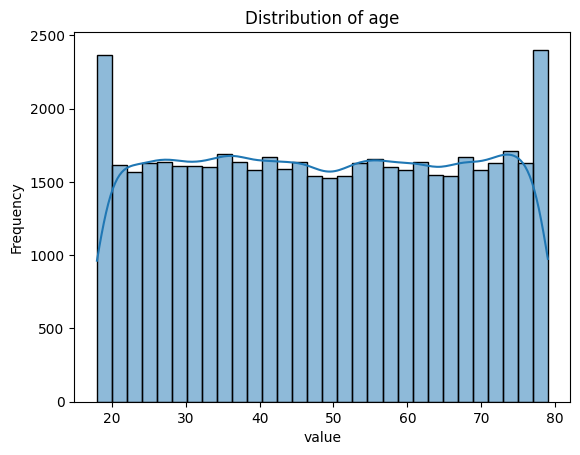

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], bins =30, kde=True)

plt.title('Distribution of age')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

Apart from the end outliers , I'll treat the distribution as a normal ,for better Variabilty and to preserve natural variation, I choose: filling missing values using random values drawn from a normal distribution with mean 48.535911 and SD 17.922048: (i.e, from summary stats)

* Retains the distribution’s natural randomness.

In [10]:
import numpy as np
# Generate random values following `mean and sd`
missing_count = df['age'].isnull().sum()
random_values = np.random.normal(48.535911, 17.922048, missing_count)

# Assign random values to missing data
df.loc[df['age'].isnull(), 'age'] = random_values



2. `monthly_income` * `pre_exisiting_conditions` * `user_satisfaction_rating`

In [11]:
df.loc[:, 'monthly_income'] = df['monthly_income'].fillna(df['monthly_income'].mean())
df.loc[:, 'pre_existing_conditions'] = df['pre_existing_conditions'].fillna("Unknown")
df.loc[:, 'user_satisfaction_rating'] = df['user_satisfaction_rating'].fillna(df['user_satisfaction_rating'].mode()[0])


# Taking the average (mean) helps retain the overall distribution without skewing too high or low.
# Instead of guessing, we label missing values as "Unknown" to avoid false assumptions.
# The mode (most common value) fills gaps while keeping the general sentiment intact.

##### <span style="color:rgb(10, 127, 143);">**Categorical**</span>

3. `pre_existing_conditions`

In [12]:
df.loc[:, 'pre_existing_conditions'] = df['pre_existing_conditions'].fillna("Unknown")

In [13]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values")
else:
    print("Missing values available in:", list(missing_columns.index))


No missing values


#### <span style="color:rgb(10, 127, 143);">**Outlier Detection & Handling** </span>

##### <span style="color:rgb(10, 127, 143);">**Visualizing Outliers** </span>

##### <span style="color:rgb(10, 127, 143);">**Statistical Outlier Detection (IQR Method)** </span>

The following step will be resumed after visualizations to give room for better contribution and analysis of raw data. i.e, understand the raw data distribution

### <span style="color:rgb(10, 127, 143);">**Data Visualization** </span>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify  
from wordcloud import WordCloud

#### <span style="color:rgb(10, 127, 143);">**Univariate Analysis (Single Variable)** </span>

Understand the distribution of individual features.

##### <span style="color:rgb(10, 127, 143);">**A. Numerical Variables** </span>

1. age

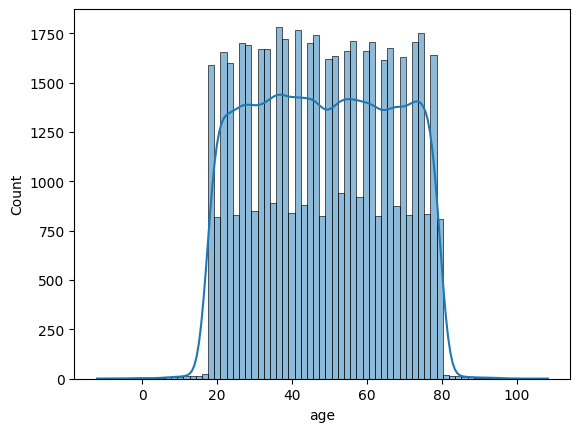

In [44]:
# Histogram for numerical distributions
sns.histplot(df['age'], kde=True)
plt.show()

2. Distribution of Monthly Income

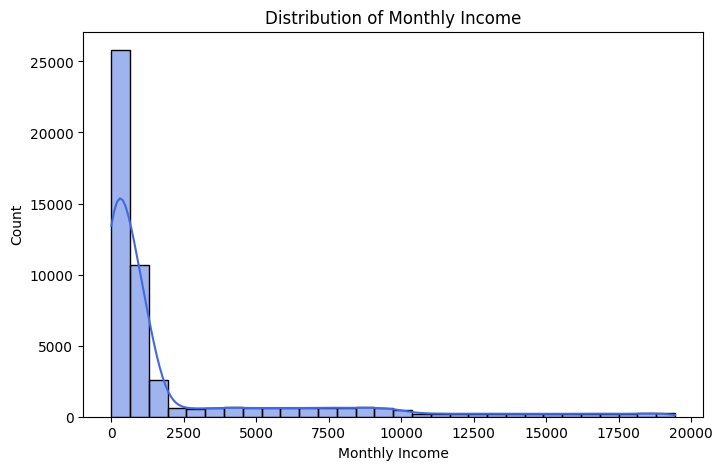

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['monthly_income'], bins=30, kde=True, color="royalblue")  # KDE adds a smooth density curve
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.title("Distribution of Monthly Income")
plt.show()

3. number_of_dependents

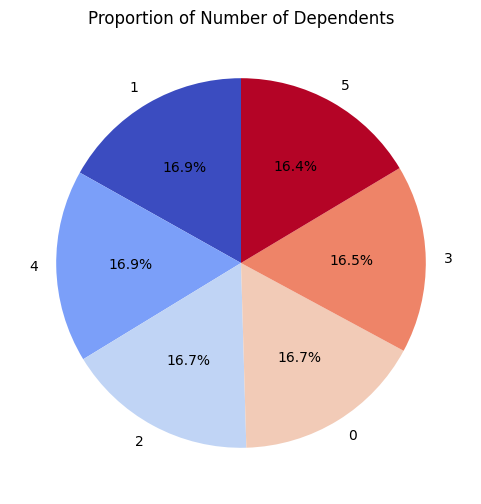

In [11]:
df['number_of_dependents'].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="coolwarm", figsize=(6, 6))
plt.ylabel("")
plt.title("Proportion of Number of Dependents")
plt.show()

4. out_of_pocket_max

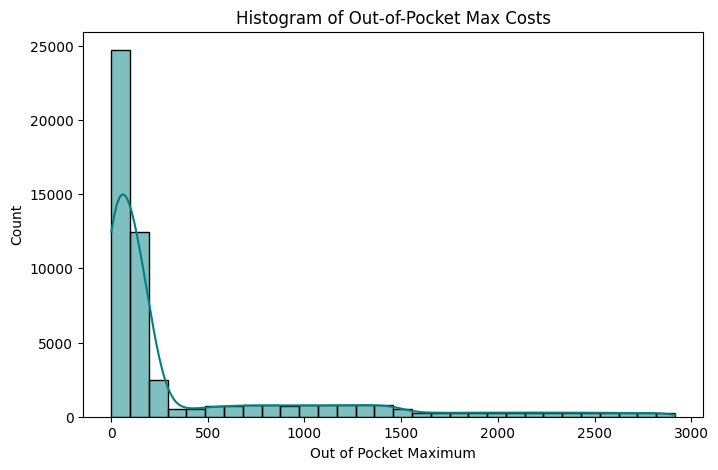

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['out_of_pocket_max'], bins=30, kde=True, color="teal")
plt.xlabel("Out of Pocket Maximum")
plt.ylabel("Count")
plt.title("Histogram of Out-of-Pocket Max Costs")
plt.show()

##### <span style="color:rgb(10, 127, 143);">**B. Categorical Variables (Single Variable)** </span>

1. Employment Status Distribution

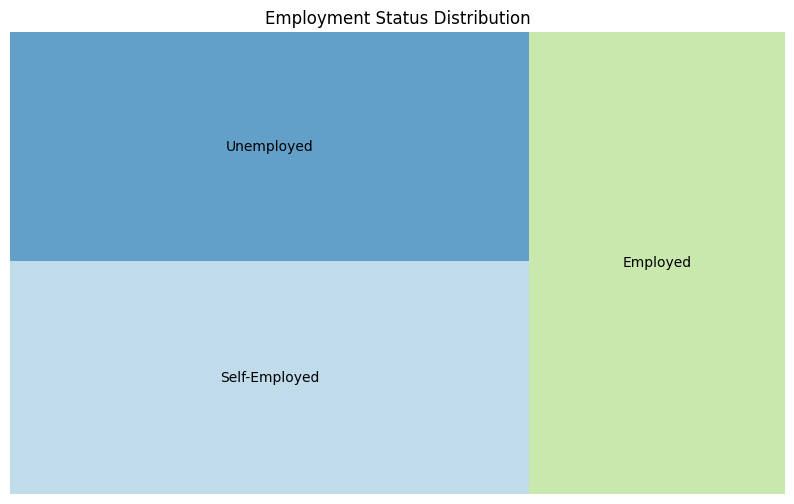

In [ ]:
category_counts = df['employment_status'].value_counts()
plt.figure(figsize=(10, 6))
squarify.plot(sizes=category_counts, label=category_counts.index, alpha=0.7, color=plt.cm.Paired.colors)
plt.axis("off")
plt.title("Employment Status Distribution")
plt.show()

2. pre_existing_conditions

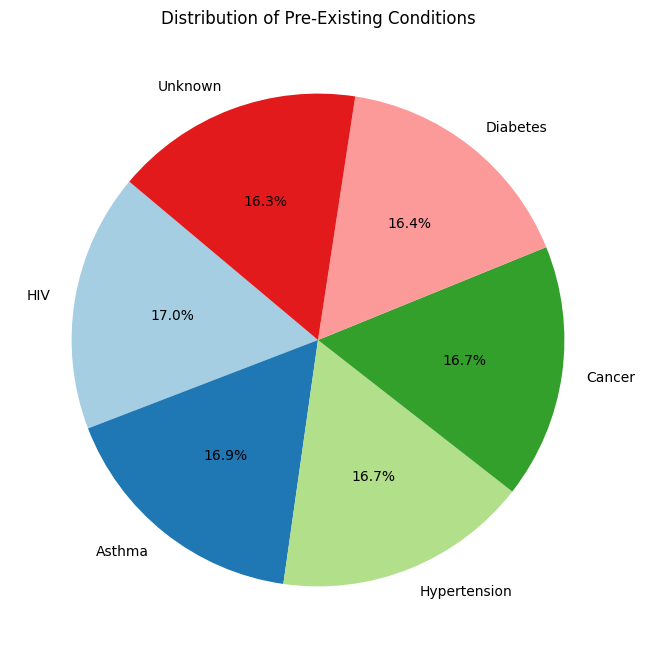

In [ ]:

# Get category counts
category_counts = df['pre_existing_conditions'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Distribution of Pre-Existing Conditions")

# Show the plot
plt.show()


3. Insurance providers

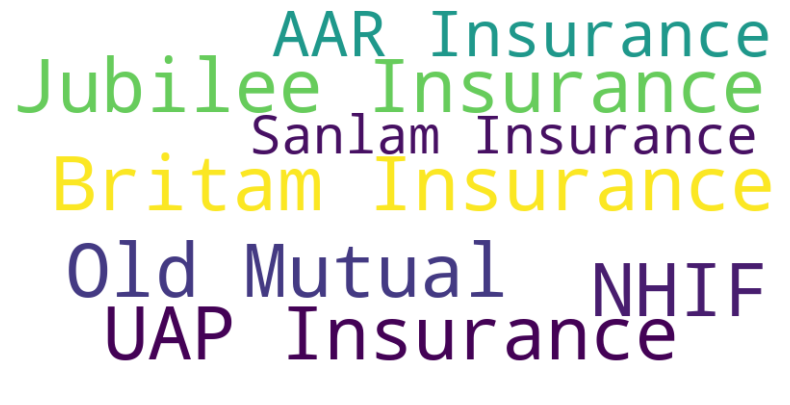

In [ ]:

# Convert category counts into a dictionary
provider_counts = df['insurance_provider'].value_counts().to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(provider_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()



4. Distribution of Preferred Hospitals

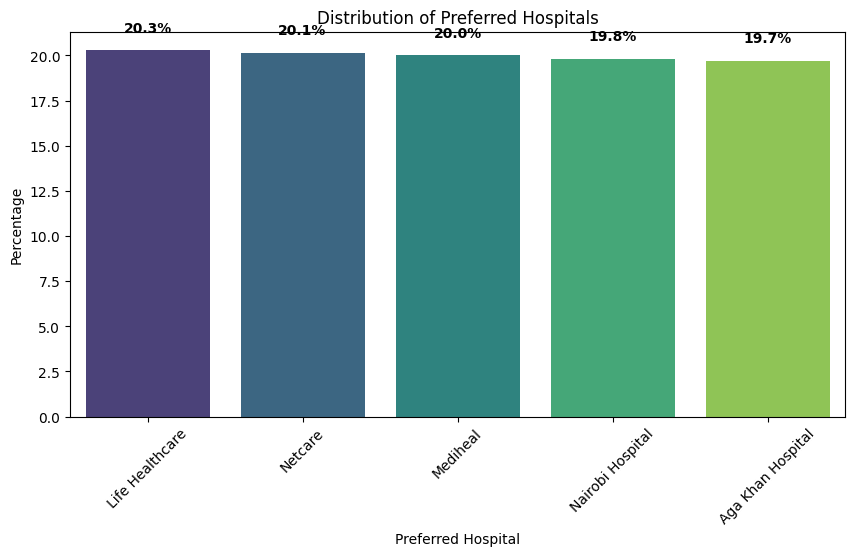

In [ ]:

# Calculate value counts and normalize to get percentages
hospital_counts = df['preferred_hospital'].value_counts(normalize=True) * 100

# Create the bar plot with hue=x and legend=False to avoid warnings
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=hospital_counts.index, y=hospital_counts, hue=hospital_counts.index, palette="viridis", dodge=False, legend=False)

# Add percentage labels on top of bars
for index, value in enumerate(hospital_counts):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.xlabel("Preferred Hospital")
plt.title("Distribution of Preferred Hospitals")

plt.show()


#### <span style="color:rgb(10, 127, 143);">**Bivariate Analysis (Two Variables)** </span>

Explore relationships between two variables.

##### <span style="color:rgb(10, 127, 143);">**Numerical vs. Numerical (Correlation & Trends)** </span>

##### <span style="color:rgb(10, 127, 143);">**Numerical vs. Categorical (Category Impact on Numbers)** </span>

#### <span style="color:rgb(10, 127, 143);">**Multivariate Analysis (Multiple Variables)** </span>

Multivariate patterns reveal deeper insights and Examine how multiple variables interact.

<div style="border-top: 2px solid rgb(19, 190, 212); margin-top: 10px; margin-bottom: 10px;"></div>
